#Data augmentation

In [20]:
# Required imports
import pandas as pd
import random


# Load dataset (Update path if loading from Drive)
df = pd.read_csv("full_df.csv")  # Or replace with the correct path

# Drop unnecessary/empty columns if needed
if 'Statement' in df.columns:
    df = df.drop(columns=['Statement'])

# Extract values
claims = df['Claim'].tolist()
labels = df['Label'].tolist()
domains = df['Domain'].tolist()

# Define simple word shuffling function
def basic_augment(sentence):
    words = sentence.split()
    if len(words) <= 3:
        return sentence
    middle = words[1:-1]
    random.shuffle(middle)
    return ' '.join([words[0]] + middle + [words[-1]])

# Set seed for reproducibility
random.seed(42)

# How many samples to augment? (30%)
num_to_augment = int(len(claims) * 0.30)

# Sample random indices
sample_indices = random.sample(range(len(claims)), num_to_augment)

# Create augmented data
augmented_claims = [basic_augment(claims[i]) for i in sample_indices]
augmented_labels = [labels[i] for i in sample_indices]
augmented_domains = [domains[i] for i in sample_indices]

# Create DataFrame for augmented data
aug_df = pd.DataFrame({
    'Claim': augmented_claims,
    'Label': augmented_labels,
    'Domain': augmented_domains
})

# Combine original and augmented datasets
augmented_full_df = pd.concat([df, aug_df], ignore_index=True)

# Shuffle the final dataset (optional but recommended)
augmented_full_df = augmented_full_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to new CSV
augmented_full_df.to_csv("augmented_full_df.csv", index=False)

# Preview
print("Original dataset size:", len(df))
print("Augmented dataset size:", len(aug_df))
print("Total size after augmentation:", len(augmented_full_df))
augmented_full_df.head()


Original dataset size: 2055
Augmented dataset size: 616
Total size after augmentation: 2671


,Claim,Label,Domain
0,For in a a to years study if visa on 5 degree ...,1,UK_STUDENT
1,"For UK, You can apply for a UK Student visa i...",0,UK_STUDENT
2,"For UK, You must submit proof that your cours...",1,UK_STUDENT
3,"For UK, You can apply for a UK Student visa f...",0,UK_STUDENT
4,"For UK, If you're under 18, you must provide ...",1,UK_STUDENT


#RNN + 5-Fold CV

Training Fold 1...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7905 - loss: 0.4882
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8893 - loss: 0.3279
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8802 - loss: 0.3156
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9062 - loss: 0.2551
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9164 - loss: 0.2327
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

📌 Fold 1 Metrics:
✅ Accuracy: 0.8280
✅ Precision: 0.8267
✅ Recall: 0.8280
✅ F1 Score: 0.8259
✅ Confusion Matrix:
 [[146  57]
 [ 35 297]]



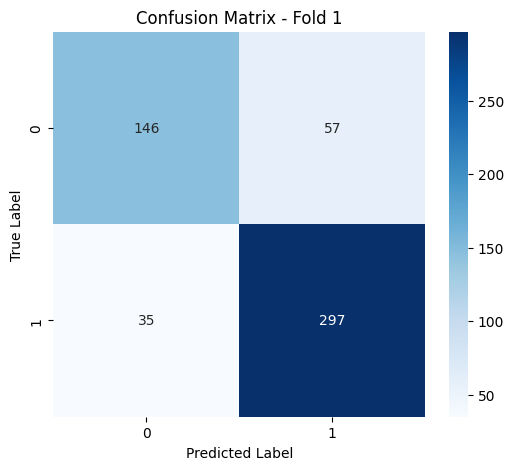

Training Fold 2...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7975 - loss: 0.4406
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9563 - loss: 0.1178
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9880 - loss: 0.0414
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9838 - loss: 0.0373
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9885 - loss: 0.0349
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

📌 Fold 2 Metrics:
✅ Accuracy: 0.9345
✅ Precision: 0.9382
✅ Recall: 0.9345
✅ F1 Score: 0.9332
✅ Confusion Matrix:
 [[165  32]
 [  3 334]]



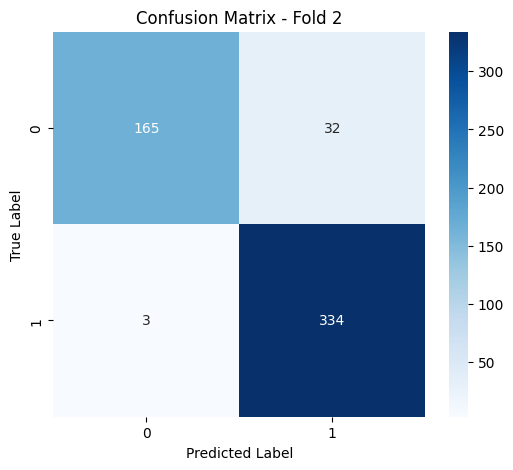

Training Fold 3...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7164 - loss: 0.5144
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9370 - loss: 0.1934
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9711 - loss: 0.0897
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9860 - loss: 0.0416
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9901 - loss: 0.0277
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

📌 Fold 3 Metrics:
✅ Accuracy: 0.9232
✅ Precision: 0.9269
✅ Recall: 0.9232
✅ F1 Score: 0.9239
✅ Confusion Matrix:
 [[187  11]
 [ 30 306]]



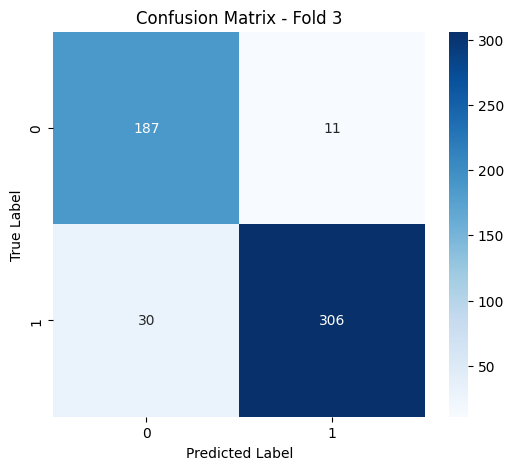

Training Fold 4...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7515 - loss: 0.4944
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9300 - loss: 0.2079
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9535 - loss: 0.1375
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9587 - loss: 0.1160
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9630 - loss: 0.0971
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

📌 Fold 4 Metrics:
✅ Accuracy: 0.8390
✅ Precision: 0.8455
✅ Recall: 0.8390
✅ F1 Score: 0.8408
✅ Confusion Matrix:
 [[155  32]
 [ 54 293]]



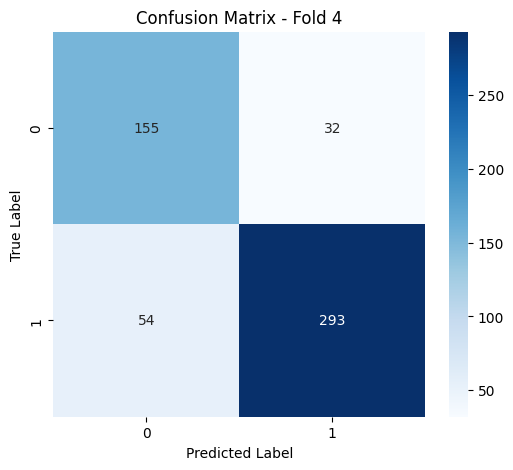

Training Fold 5...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7767 - loss: 0.4657
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9511 - loss: 0.1466
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9757 - loss: 0.0766
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9751 - loss: 0.0814
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9843 - loss: 0.0399
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

📌 Fold 5 Metrics:
✅ Accuracy: 0.9569
✅ Precision: 0.9574
✅ Recall: 0.9569
✅ F1 Score: 0.9567
✅ Confusion Matrix:
 [[197  17]
 [  6 314]]



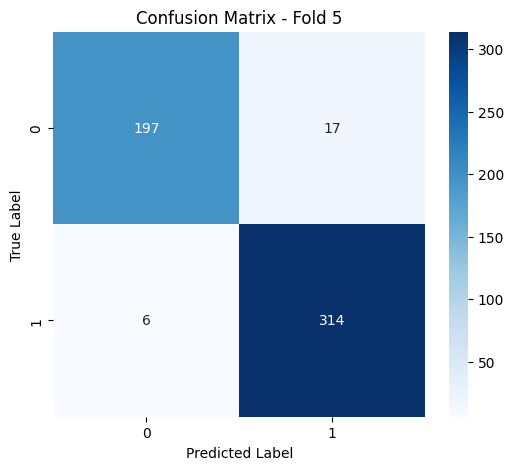

🎯 Average 5-Fold Accuracy: 0.8963190871224054


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

# Load your dataset
df = pd.read_csv("augmented_full_df.csv")  # Update with your file path
texts = df['Claim'].astype(str).tolist()
labels = df['Label'].tolist()

# One-hot encode labels
num_classes = len(set(labels))
y = to_categorical(labels, num_classes=num_classes)

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
max_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
accuracy_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Vanilla RNN model
    model = Sequential([
        Embedding(input_dim=10000, output_dim=100, input_length=max_length),
        SimpleRNN(64, return_sequences=False),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train
    print(f"Training Fold {fold}...")
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

    # Evaluate
    y_pred = model.predict(X_val)
    y_pred_labels = np.argmax(y_pred, axis=1)  # Convert one-hot to label index
    y_true_labels = np.argmax(y_val, axis=1)   # Convert one-hot to label index

    # Compute Metrics
    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
    conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

    # Store Accuracy
    accuracy_scores.append(accuracy)

    # Print Metrics
    print(f"\n📌 Fold {fold} Metrics:")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")
    print(f"✅ Confusion Matrix:\n {conf_matrix}\n")

    # --- Visualizing Confusion Matrix ---
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true_labels), yticklabels=np.unique(y_true_labels))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.show()

    fold += 1

# Final Result
print("🎯 Average 5-Fold Accuracy:", np.mean(accuracy_scores))


In [22]:
# Save the trained model (after last fold)
model.save("rnn_text_classification_model.h5")  # Saves in .h5 format

# Save the tokenizer for inference
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("Model and tokenizer saved successfully!")


Model and tokenizer saved successfully!


In [23]:
import pandas as pd

# Assuming df contains your augmented dataset
# Replace 'Augmented_Text' and 'Label' with actual column names
df_augmented = pd.DataFrame({
    "Sample": df["Claim"],  # Text or filename
    "Label": df["Label"]    # Corresponding labels
})

# Save as CSV
df_augmented.to_csv("augmented_data_labels.csv", index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Get predictions
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert from one-hot to label index
y_true_labels = np.argmax(y_val, axis=1)   # Convert from one-hot to label index

# Calculate metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Store results for final reporting
accuracy_scores.append(accuracy)

print(f"Fold {fold} Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix, "\n")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Fold 6 Metrics:
Accuracy: 0.9569
Precision: 0.9574
Recall: 0.9569
F1 Score: 0.9567
Confusion Matrix:
 [[197  17]
 [  6 314]] 



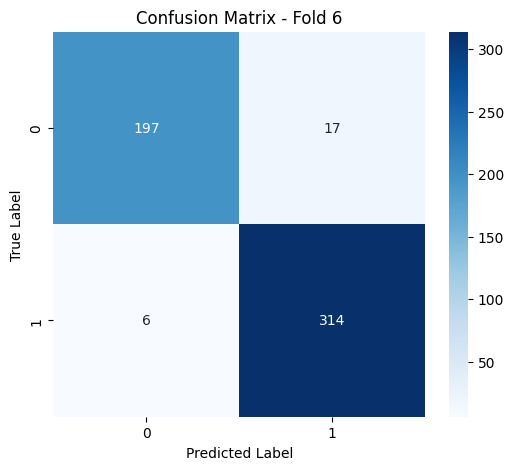

<ipython-input-25-d9984749a263>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


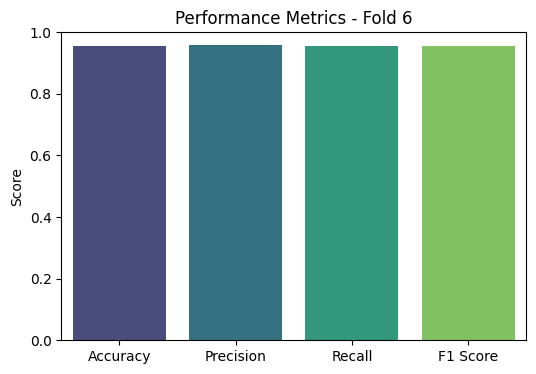

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Confusion Matrix Heatmap ---
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true_labels), yticklabels=np.unique(y_true_labels))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - Fold {fold}")
plt.show()

# --- 2️⃣ Bar Chart for Accuracy, Precision, Recall, F1-score ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6,4))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.ylim(0, 1)
plt.title(f"Performance Metrics - Fold {fold}")
plt.ylabel("Score")
plt.show()


In [26]:
print("Final 5-Fold Evaluation:")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")


Final 5-Fold Evaluation:
Average Accuracy: 0.9064
